In [9]:
# Lista de Exercícios de Mineração de Dados
# Gustavo Nunes Lopes

In [10]:
# Questão 1
# A)

import pathlib
import numpy as np
import pandas as pd

def remove_incomplete_data(data: list):
    """
    Remover dados faltantes (-100) de uma lista de listas.
    Só adiciona à lista se todos os valores forem válidos.
    """
    cleaned_data = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == -100:
                break
        else:
            cleaned_data.append(data[i])

    return cleaned_data

def split_X_y(data: list):
    """
    Separa os dados em atributos (X) e rótulos (y).
    """
    X = np.array([row[:7] for row in data], dtype=float)
    y = np.array([row[7] for row in data])  # label

    return X, y

def accuracy_metric(actual, predicted):
    """
    Calcula a acurácia entre os valores reais e previstos.
    """
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1

    return correct / len(actual) * 100.0

def rocchio_train(X_train, y_train):
    """
    Treina o classificador Rocchio calculando os centróides para cada classe.
    """
    centroids = {}
    classes = np.unique(y_train)

    for c in classes:
        Xc = X_train[y_train == c]
        centroids[c] = np.mean(Xc, axis=0)  # vetor de 7 dimensões
    return centroids

def rocchio_predict(centroids, X_test):
    """ 
    Faz previsões usando o classificador Rocchio.
    """   
    classes = list(centroids.keys())
    y_pred = []

    for x in X_test:
        best_class = None
        best_dist = None

        for c in classes:
            d = euclidean_distance(x, centroids[c])
            if best_dist is None or d < best_dist:
                best_dist = d
                best_class = c

        y_pred.append(best_class)

    return np.array(y_pred)

def euclidean_distance(point1, point2):
    """
    Calcula a distância euclidiana entre dois pontos. 
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def nn_predict(X_train, y_train, X_test):
    """ 
    Faz previsões usando o classificador Nearest Neighbor (NN).
    """
    y_pred = []

    for x in X_test:
        best_dist = None
        best_label = None

        for i in range(len(X_train)):
            d = euclidean_distance(x, X_train[i])

            if best_dist is None or d < best_dist:
                best_dist = d
                best_label = y_train[i]

        y_pred.append(best_label)

    return np.array(y_pred)

# Main
# # Carregando os arquivos de texto
nebulosa_path_train = pathlib.Path().absolute() / 'db' / 'nebulosa_train.txt'
nebulosa_path_test = pathlib.Path().absolute() / 'db' / 'nebulosa_test.txt'

# Lendo os arquivos
with open(nebulosa_path_train, 'r') as file:
    nebulosa_train = file.read().split()
    new_nebulosa_train = []
    for i in range(0, len(nebulosa_train), 8):
        new_nebulosa_train.append(nebulosa_train[i:i+8])

    for i in range(len(new_nebulosa_train)):
        for j in range(len(new_nebulosa_train[i])):
            if j != 7:
                new_nebulosa_train[i][j] = float(new_nebulosa_train[i][j])

with open(nebulosa_path_test, 'r') as file:
    nebulosa_test = file.read().split()
    new_nebulosa_test = []
    for i in range(0, len(nebulosa_test), 8):
        new_nebulosa_test.append(nebulosa_test[i:i+8])

    for i in range(len(new_nebulosa_test)):
        for j in range(len(new_nebulosa_test[i])):
            if j != 7:
                new_nebulosa_test[i][j] = float(new_nebulosa_test[i][j])

# Removendo dados incompletos
nebulosa_train_cleaned = remove_incomplete_data(new_nebulosa_train)
nebulosa_test_cleaned = remove_incomplete_data(new_nebulosa_test)

# Verificando o tamanho dos datasets
print("Treino original:", len(new_nebulosa_train), " | Treino limpo:", len(nebulosa_train_cleaned))
print("Teste original :", len(new_nebulosa_test),  " | Teste limpo :", len(nebulosa_test_cleaned))

# Separando em treinamento e teste
X_train, y_train = split_X_y(nebulosa_train_cleaned)
X_test, y_test   = split_X_y(nebulosa_test_cleaned)

print("\n===== QUESTÃO 1A =====")

# ---- NN ----
y_pred_nn = nn_predict(X_train, y_train, X_test)
acc_nn = accuracy_metric(y_test, y_pred_nn)
print(f"Acurácia NN: {acc_nn:.2f}%")

# ---- Rocchio ----
centroids = rocchio_train(X_train, y_train)
y_pred_rocchio = rocchio_predict(centroids, X_test)
acc_rocchio = accuracy_metric(y_test, y_pred_rocchio)
print(f"Acurácia Rocchio: {acc_rocchio:.2f}%")

Treino original: 143  | Treino limpo: 134
Teste original : 28  | Teste limpo : 25

===== QUESTÃO 1A =====
Acurácia NN: 56.00%
Acurácia Rocchio: 0.00%


In [11]:
# Questão 1
# B)

def clip_outliers_iqr(X_train, X_test, k=1.5):
    """
    Para remover outliers usando o método do IQR.
    Referência: https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/
    """
    Q1 = np.percentile(X_train, 25, axis=0, method='midpoint')
    Q3 = np.percentile(X_train, 75, axis=0, method='midpoint')
    IQR = Q3 - Q1

    lower = Q1 - k * IQR
    upper = Q3 + k * IQR

    X_train_clipped = np.clip(X_train, lower, upper)
    X_test_clipped  = np.clip(X_test,  lower, upper)

    return X_train_clipped, X_test_clipped

def minmax_normalize(X_train, X_test):
    """ 
    Normaliza os dados usando a técnica Min-Max.
    """
    min_val = np.min(X_train, axis=0)
    max_val = np.max(X_train, axis=0)

    X_train_scaled = (X_train - min_val) / (max_val - min_val)
    X_test_scaled  = (X_test  - min_val) / (max_val - min_val)

    return X_train_scaled, X_test_scaled

# Main
# Dividindo entre treinamento e teste
X_train, y_train = split_X_y(nebulosa_train_cleaned)
X_test, y_test   = split_X_y(nebulosa_test_cleaned)

print("===== QUESTÃO 1B =====")

# Removendo outliers
X_train, X_test = clip_outliers_iqr(X_train, X_test)

# Aplicando normalização
X_train, X_test = minmax_normalize(X_train, X_test)

# ---- NN ----
y_pred_nn = nn_predict(X_train, y_train, X_test)
acc_nn = accuracy_metric(y_test, y_pred_nn)
print(f"Acurácia NN: {acc_nn:.2f}%")

# ---- Rocchio ----
centroids = rocchio_train(X_train, y_train)
y_pred_rocchio = rocchio_predict(centroids, X_test)
acc_rocchio = accuracy_metric(y_test, y_pred_rocchio)
print(f"Acurácia Rocchio: {acc_rocchio:.2f}%")

===== QUESTÃO 1B =====
Acurácia NN: 64.00%
Acurácia Rocchio: 4.00%


In [12]:
# Questão 1
# C)

# Os resultados obtidos na questão 1B mostram que uma aplicação de técnicas de pré-processamento ajudam a melhorar a acurácia dos classificadores NN e Rocchio.
# Isso se deve ao fato de que a remoção de outliers e a utilização de valores normalizados reduz o impacto de valores extremos que podem distorcer a análise dos dados.

In [24]:
# Questão 2
# A)

import spacy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

tweets_path = pathlib.Path().absolute() / 'db' / 'Tweets_Mg.csv'
df = pd.read_csv(tweets_path)
# print(df.head())

nlp = spacy.load("pt_core_news_sm")

# teste = nlp("Este é um texto de teste.")
# print(teste.vector)

def embeddings_generator(textos):
    """
    Gera uma matriz de embeddings para uma lista de textos usando spacy
    """
    embeddings = []
    for doc in nlp.pipe(textos):
        embeddings.append(doc.vector)
    return np.array(embeddings)

print("===== QUESTÃO 2A =====")

X = embeddings_generator(df["Text"].astype(str))
# print(X)
y = df["Classificacao"].values

X_train = X[:8000] # As primeira 8000 amostras para treino
y_train = y[:8000]

X_test = X[8000:] # O restante para teste
y_test = y[8000:]

y_pred = nn_predict(X_train, y_train, X_test)

accuracy = accuracy_metric(y_test, y_pred)
print("Acurácia NN (implementação prória): ", f"{accuracy:.2f}%")

# Agora utilizando o scikit-learn
knn = KNeighborsClassifier(n_neighbors=1) # k=5 por padrão, então pra ficar igual à nossa implementação 
# usamos k=1

knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)

accuracy_scikit_learn = accuracy_score(y_test, y_pred_sklearn) * 100

print("Acurácia NN (scikit-learn):", f"{accuracy_scikit_learn:.2f}%")

===== QUESTÃO 2A =====
Acurácia NN (implementação prória):  89.95%
Acurácia NN (scikit-learn): 89.95%


In [ ]:
# Questão 2
# A) (Continuação)

# A acurácia obtida utilizando a implementaçlão manual é igual a utilizando 
# a biblioteca scikit-learn, pois ambos os métodos utilizam o mesmo algoritmo. A diferença
# é que a minha implementação manual foi feita pra utilizar apenas k=1, enquanto a biblioteca
# scikit-learn permite escolher o valor de k. Caso mantenhamos o k=5 na biblioteca, a acurácia da um valor menor do que
# a implementação manual com k=1.

In [23]:
# Questão 2
# B) 
"""
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
"""

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("===== QUESTÃO 2B =====")

# Aplicando normalização z-score
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test  = scaler.transform(X_test)

# Agora é escolher o menor m que variância acumulada >= 90%
pca_full = PCA(n_components=None)
pca_full.fit(Z_train)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)
n = int(np.searchsorted(cum_var, 0.90) + 1) # +1 pois o índice começa em 0

print(f"Nº de componentes para 90% variância: m = {n}")
print(f"Variância: {cum_var[n-1]*100:.2f}%")

# Agora aplica PCA já com n_components = m
pca = PCA(n_components=n)
X_train_pca = pca.fit_transform(Z_train)
X_test_pca  = pca.transform(Z_test)

# Agora rodando o NN novamente...
y_pred_pca = nn_predict(X_train_pca, y_train, X_test_pca)
acc_pca = accuracy_metric(y_test, y_pred_pca)

print("Acurácia NN com PCA:", f"{acc_pca:.2f}%")
print(f"Dimensão original: {X_train.shape[1]} | Dimensão após PCA: {n}")

===== QUESTÃO 2B =====
Nº de componentes para 90% variância: m = 37
Variância: 90.20%
Acurácia NN com PCA: 92.96%
Dimensão original: 96 | Dimensão após PCA: 37


In [25]:
# Questão 2
# B) (Continuação)

# O uso do PCA não resultou em alteração significativa no desempenho obtido no item anterior,
# uma vez que a acurácia teve uma diferença de aproximadamente 3%. 
# Em contrapartida, observou-se uma redução expressiva da dimensionalidade dos dados, 
# preservando mais de 90% da variância original. A principal vantagem do uso do PCA foi a
# diminuição do custo computacional e a eliminação de redundâncias entre atributos, 
# tornando o modelo mais eficiente sem comprometer o seu desempenho.

In [ ]:
# Questão 3
# A)

In [ ]:
# Questão 3
# B)

In [ ]:
# Questão 3
# C)

c:\Users\Gustavo13\Documents\GitHub\data_mining_work\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Gustavo13\Documents\GitHub\data_mining_work\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Gustavo13\Documents\GitHub\data_mining_work\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Gustavo13\Documents\GitHub\data_mining_work\venv\Lib\site-packages\sklearn\neighbors\_classificat

k final: 5
Acurácia: 0.8166666666666667
Precisão: 0.8284600389863548
Recall: 0.6024096385542169
F1: 0.6975789905621665


c:\Users\Gustavo13\Documents\GitHub\data_mining_work\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


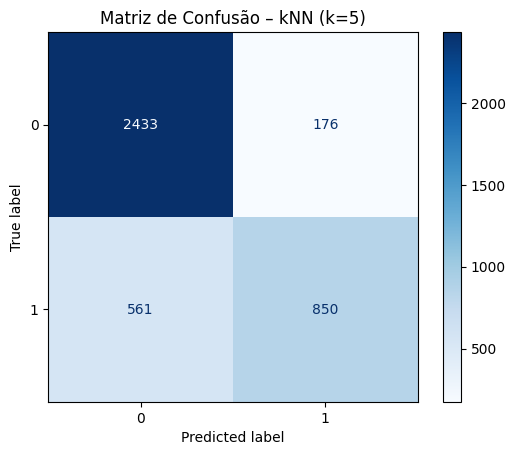

In [ ]:
# Questão 4
# A)
import matplotlib.pyplot as plt

magic_data_path = pathlib.Path().absolute() / 'db' / 'magic_gamma_telescope' / 'magic04.data'

df = pd.read_csv(magic_data_path, header=None)

# df.describe()

X = df.iloc[:, :-1]
y = df.iloc[:, [10]] # label

# embaralhar
rng = np.random.RandomState(42)
index = rng.permutation(len(X))

X = X.iloc[index].reset_index(drop=True)
y = y.iloc[index].reset_index(drop=True)

# split
X_test = X.iloc[:4020].reset_index(drop=True)
y_test = y.iloc[:4020].reset_index(drop=True)

X_15 = X.iloc[4020:].reset_index(drop=True) 
y_15 = y.iloc[4020:].reset_index(drop=True)

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# classe minoritária
minority_label = y_15.value_counts().idxmin()
# print(minority_label)

# scorer F1 para classe minoritária sendo o label positivo
f1_min = metrics.make_scorer(metrics.f1_score, pos_label=minority_label[0])
# 3-fold
three_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {"n_neighbors": list(range(1,10))}

best_ks = []
f1_folds = []

for train_idx, val_idx in three_fold.split(X_15, y_15):
    X_train = X_15.iloc[train_idx]
    y_train = y_15.iloc[train_idx]

    X_val = X_15.iloc[val_idx]
    y_val = y_15.iloc[val_idx]

    knn = KNeighborsClassifier()

    gscv = GridSearchCV(knn, param_grid, scoring=f1_min, cv=3)
    gscv.fit(X_train, y_train)

    best_k = gscv.best_params_["n_neighbors"]
    best_ks.append(best_k)

    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    f1 = metrics.f1_score(y_val, y_pred, pos_label=minority_label[0])
    f1_folds.append(f1)

# escolhe o melhor k
final_k = max(set(best_ks), key=best_ks.count)

# treino final com as 15k
final_model = KNeighborsClassifier(n_neighbors=final_k)
final_model.fit(X_15, y_15)

# avaliação no conjunto de teste
y_test = y_test.iloc[:, 0]
y_pred_test = final_model.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred_test)
prec = metrics.precision_score(y_test, y_pred_test, pos_label=minority_label[0])
rec = metrics.recall_score(y_test, y_pred_test, pos_label=minority_label[0])
f1 = metrics.f1_score(y_test, y_pred_test, pos_label=minority_label[0])
cm = metrics.confusion_matrix(y_test, y_pred_test)

print("k final:", final_k)
print("Acurácia:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1:", f1)
# print("Matriz de confusão:\n", cm)

matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap="Blues")
plt.title("Matriz de Confusão – kNN (k={})".format(final_k))
plt.show()

In [ ]:
# Questão 4
# B)


In [ ]:
# Questão 4
# C)

In [ ]:
# Questão 4
# D)

In [ ]:
# Questão 5
# A)

In [ ]:
# Questão 5
# B)

In [ ]:
# Questão 5
# C)

In [ ]:
# Questão 6
# A)
# As regras de decisão para cada classe:
# C1:
#   X1 <= 4 E X2 <= 12;
#   X1 <= 4 E X2 > 15;
#   4 < X1 <= 10  E  X2 > 15;

# C2:
#   X1 <= 4 E 12 < X2 <= 15;
#   4 < X1 <= 10 E 8 < X2 <= 15;

# C3:
#   X1 > 4 E X2 <= 8;

# C4:
#   X1 > 10 E X2 > 8;

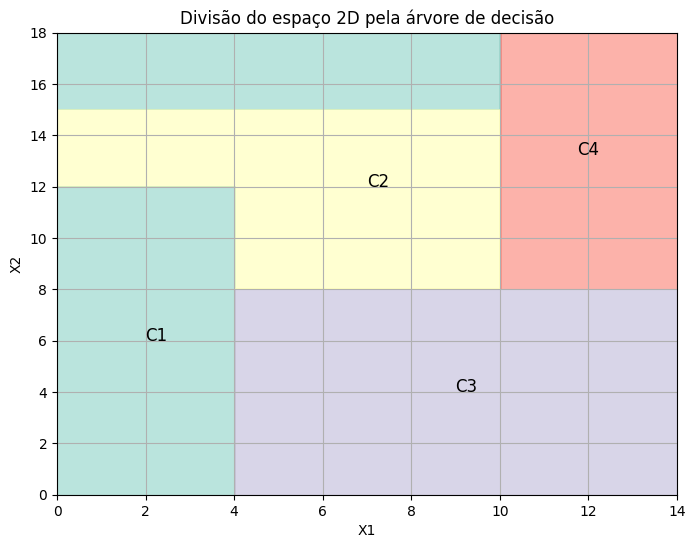

In [ ]:
# Questão 6
# B)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_tree_class(x1, x2):
    """
    Função que implementa a árvore de decisão para classificar pontos no espaço 2D
    """
    # C3
    if x1 > 4 and x2 <= 8:
        return 3

    # Lado esquerdo (X1 <= 4)
    if x1 <= 4:
        if x2 <= 12:
            return 1      # C1
        elif x2 <= 15:
            return 2      # C2
        else:
            return 1      # C1

    # Lado direito superior
    if x1 > 4 and x2 > 8:
        if x1 > 10:
            return 4      # C4
        else:
            if x2 > 15:
                return 1  # C1
            else:
                return 2  # C2

# Geração da malha
x1_vals = np.linspace(0, 14, 400)
x2_vals = np.linspace(0, 18, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

Z = np.zeros(X1.shape)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = decision_tree_class(X1[i, j], X2[i, j])

cmap = ListedColormap(["#8dd3c7", "#ffffb3", "#bebada", "#fb8072"])

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.6, cmap=cmap)

# Classe labels
plt.text(2, 6, "C1", fontsize=12)
plt.text(7, 12, "C2", fontsize=12)
plt.text(9, 4, "C3", fontsize=12)
plt.text(11.75, 13.25, "C4", fontsize=12)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Divisão do espaço 2D pela árvore de decisão")
plt.grid(True)
plt.show()


In [ ]:
# Questão 6
# C)
# Sabendo-se que X1 = 3.5 e X2 = ?, a amostra segue pelo ramo X1 ≤ 4 da árvore. 
# O próximo teste seria em relação ao atributo X2, porém esse valor não está disponível.
# Nesse caso, aplica-se o método probabilístico, no qual a amostra não é enviada para apenas um ramo, 
# mas considerada em todos os caminhos possíveis a partir daquele nó. A decisão final é feita observando qual
# classe aparece com maior frequência nas folhas alcançáveis dessa subárvore.
# Observando, sabe-se que as classes possíveis são C1, C2 e C1. Como temos 2/3 de chances de ser classe C1 e 1/3 de ser C2,
# a amostra seria classificada como C1.

(19735, 27) (19735,)


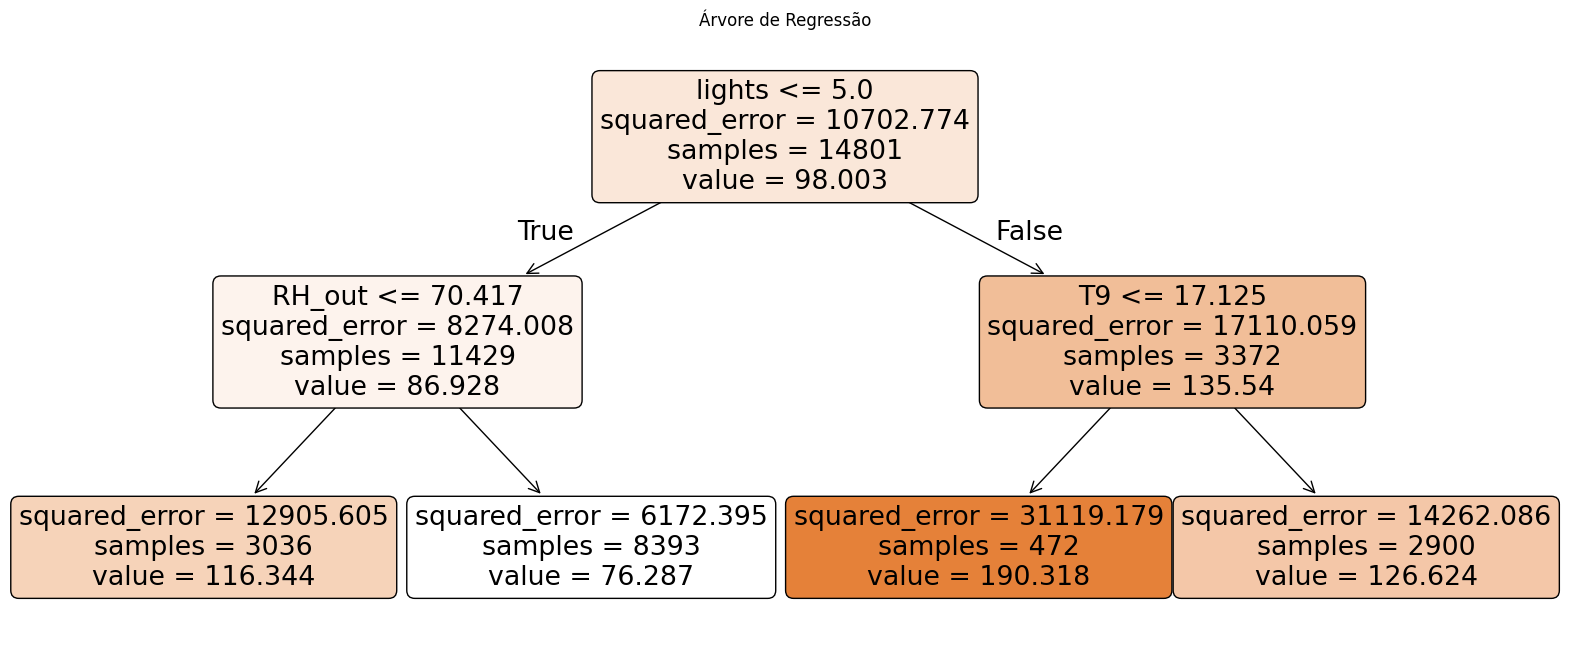

In [ ]:
# Questão 7
# A)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

path_db = pathlib.Path().absolute() / 'db' / 'appliances_energy_prediction' / 'energydata_complete.csv'
df = pd.read_csv(path_db)

# df.head()

X = df.drop(columns=["Appliances", "date"])  # atributos
y = df["Appliances"]                         # rótulo
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,   # 25% para avaliação
    random_state=42,
    shuffle=True
)

reg = DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(
    reg,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Árvore de Regressão")
plt.show()



In [ ]:
# Questão 7
# B)
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error

y_pred = reg.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
print("MAPE (%):", 100 * mape)

rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)


MAPE: 0.6817996023880972
MAPE (%): 68.17996023880973
RMSE: 95.74449196081423


In [ ]:
# Questão 7
# C)
from sklearn.tree import export_text

rules = export_text(reg, feature_names=list(X.columns))
print(rules)


|--- lights <= 5.00
|   |--- RH_out <= 70.42
|   |   |--- value: [116.34]
|   |--- RH_out >  70.42
|   |   |--- value: [76.29]
|--- lights >  5.00
|   |--- T9 <= 17.12
|   |   |--- value: [190.32]
|   |--- T9 >  17.12
|   |   |--- value: [126.62]



In [ ]:
# Questão 8
 # Não estou conseguindo acessar o link

In [ ]:
# Questão 9

market_basket_path = pathlib.Path().absolute() / 'db' / 'Market_Basket_Optimisation.txt'
# df = pd.read_csv(market_basket_path, header=None)

In [ ]:
##################### QUESTÕES TEÓRICAS #####################

In [ ]:
# Questão 1
# a) “Quanto mais variáveis de entrada forem usadas em um modelo de aprendizado de 
# máquina, melhor será a qualidade do modelo”. 

# Resposta: Depende, pois, embora mais variáveis possam fornecer mais informações, 
# elas também podem conter muitos dados ruidosos, faltantes, ou até mesmo dados irrelevantes, 
# oque pode fazer com que o modelo aprenda padrões incorretos.


In [ ]:
# Questão 1
# b) “Independente da qualidade, quanto mais amostras forem obtidas para uma base de 
# dados, maior a tendência de se obter modelos mais adequados”.

# Resposta: Falso, pois, a qualidade dos dados é crucial, visto que dados de baixa qualidade podem introduzir ruído.
# Logo, não adianta ter muitos dados se eles não forem confiáveis.

In [ ]:
# Questão 1
# c) “Às vezes com simples manipulações na base de dados (limpeza, conversão de valores, 
# etc.) pode-se conseguir melhoras significativas nos resultados, sem fazer nenhuma 
# alteração na técnica de aprendizado de máquina usada”. 

# Resposta: Verdade, pois, técnicas de pré-processamento de dados pode melhorar a qualidade dos dados,
# o que pode levar a melhores resultados sem alterar o modelo.

In [ ]:
# Questão 2

# Investimento conservador
# Valor Esperado = 30000*0,1 + 5000*0,5 + −10000*0,4
# Valor Esperado = 3000 + 2500 − 4000 = 1500

# Investimento especulativo
# Valor Esperado = 40000*0,1 + 10000*0,5 + −30000*0,4
# Valor Esperado = 4000 + 5000 − 12000 = -3000

# Investimento cíclico
# Valor Esperado = -10000*0,1 + 0*0,5 + 15000*0,4
# Valor Esperado = -1000 + 0 + 6000 = 5000

# Portanto, o investimento mais apropriado é o cíclico, pois se obtem o maior lucro esperado.

In [ ]:
# Questão 3

# O desempenho do Random Forest depende do equilíbrio entre a força das árvores e a correlação entre elas. 
# Árvores fortes aumentam a qualidade das decisões, enquanto baixa correlação permite que os erros de uma árvore sejam
# compensados pelas outras, resultando em um modelo mais robusto.